In [1]:
%reset -f
%run pylib/kde_doc paper dark

all_data = kde_setup(title='Galacticity analysis',
                    cut = '0.12<Ep<10 & variability<30' )

all_data['G']= all_data.diffuse.clip(-1,2) # for convenience
all_data['rel_flux'] =  all_data.log_fpeak-all_data.G
subgrp = all_data.groupby('subset')
unid = subgrp.get_group('unID').copy()
blazar= subgrp.get_group('blazar')
pulsar = all_data.query('association_class=="pulsar"')

show(f"""--- 
Make 1-D KDEs with G, and the populations psr, msp, and blazar""")

show(pd.Series(subgrp.size(), name='Count'))
galfunc = GalFunctions(all_data)
set_theme('dark');

<font size="+3"> Galacticity analysis</font>

<h5 style="text-align:right; margin-right:15px"> 2024-11-10 08:59</h5>

# Data setup
* Load source data from `files/dr4_2_class_3_features.csv'

### Data selection cut: "0.12<Ep<10 & variability<30"

association_class,blazar,pulsar,Gal,egal,bcu_unk,unID
total,2283,316,219,88,1698,2205
selected,516,306,171,36,713,1572
%,23,97,78,41,42,71


# Create KDE functions instead of ML training

* Features: sqrt_d, log_epeak, diffuse 

saved KDE setup to `files/kde_data.csv`

--- 
Make 1-D KDEs with G, and the populations psr, msp, and blazar

subset,blazar,msp,psr,unID
Count,516,173,133,1572


# Analyze the unID-pulsar distribution in G 
In the following plot, we show a histogram of the 912 
unID pulsar-like sources, with overlays of scaled plots of the KDE density functions for msp and psr.
The scale factors, adjusted by eye, correspond to totals of (310, 280) sources, respectively.

This would suggest that perhaps 322 pulsar-like sources 
are not actually pulsars, with a distribution in $G$ intermediate betwee the known pulsar types.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b9401870>
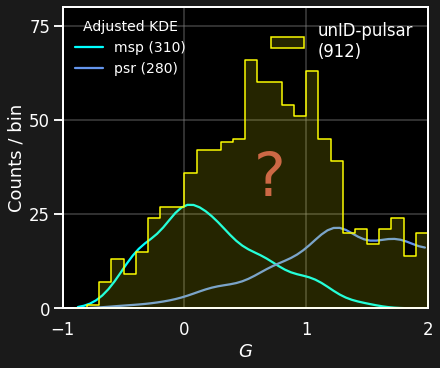

In [2]:
show(f"""# Analyze the unID-pulsar distribution in G 
In the following plot, we show a histogram of the {(N:=sum(galfunc.data.source_type=="unID-pulsar"))} 
unID pulsar-like sources, with overlays of scaled plots of the KDE density functions for msp and psr.
The scale factors, adjusted by eye, correspond to totals of {(adjust:=(310,280))} sources, respectively.
""")
show(f"""This would suggest that perhaps {N-np.sum(adjust)} pulsar-like sources 
are not actually pulsars, with a distribution in $G$ intermediate between the known pulsar types.""")
show_fig(galfunc.plot_unID_pred,  adjust=adjust, 
         save_to='figures/galacticity/unID-pulsar.png',facecolor='k')

In [3]:
galfunc.data.groupby('association_class').size()

association_class
Gal         171
bcu_unk     713
blazar      516
egal         36
gc            1
nov           1
pulsar      306
unID       1572
dtype: int64

## $F_p$ vs. $G$, with $d>0.5$ to suppress blazars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ffa27fc6680>
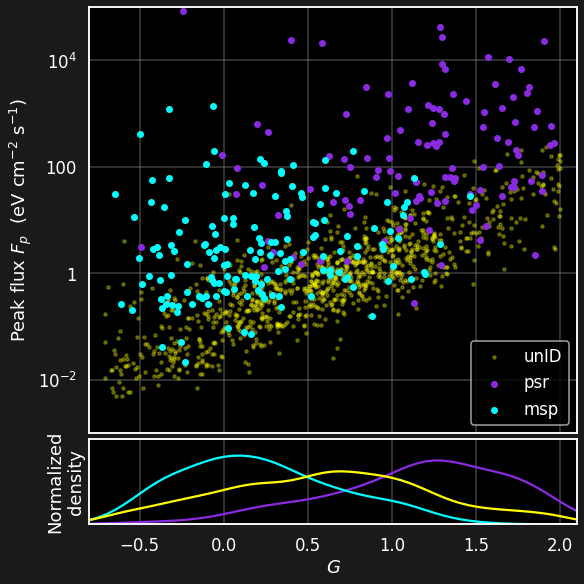

In [4]:
def fp_vs_G(data, palette='blueviolet cyan yellow'.split()):
    
    fig,(axt,axb) = plt.subplots(nrows=2, figsize=(8,8), height_ratios=(5,1), 
                                 sharex=True, gridspec_kw=dict(hspace=0) )
    grp = data.groupby('association')
    
    axt.scatter(data=grp.get_group('unID').query('Fp<400'), 
                label='unID',  x='G', y='log_fpeak', s=10,
                color='yellow', alpha=0.3)
    for p, color in zip('psr msp'.split(), palette):
        axt.scatter(data=grp.get_group(p),  x='G', y='log_fpeak',
                   s=30, color=color, label=p)
    axt.legend(frameon=True, loc='lower right')
    axt.set(**fpeak_kw('y'),  xlim=(-0.8,2.1));


    from pylib.kde import Gaussian_kde
    gkde = dict((name, Gaussian_kde(grp.get_group(name), cols=['G']).evaluate)
                for name in 'psr msp unID'.split())
    for (name,func), color in zip(gkde.items(), palette): #palette[:2]+['yellow']):
        axb.plot((x:=np.arange(-0.8,2.2, 0.05)), func(x), color=color)
    axb.set(xlabel='$G$', yticks=[], ylabel='Normalized\ndensity', ylim=(0,1))
    return fig

show(f"""## $F_p$ vs. $G$, with $d>0.5$ to suppress blazars""")
show_fig(fp_vs_G ,  all_data.query('d>0.5'), facecolor='k',
         save_to='figures/galacticity/fp_vs_G.png')

In [5]:
show(f"""Notes:
* msp-psr separation as good as $|b|$
* For the unID, $F_p$ varies by five orders of magnitude
* The unID distribution is incompatible with a mixture of pulsars &mdash;
peak at 0.5 corresponds to Benoit's "shoulder" 
* Curves are from a KDE prediction, derived form the data, of the density: 
unsupervised machine learning
""")

Notes:
* msp-psr separation as good as $|b|$
* For the unID, $F_p$ varies by five orders of magnitude
* The unID distribution is incompatible with a mixture of pulsars &mdash;
peak at 0.5 corresponds to Benoit's "shoulder" 
* Curves are from a KDE prediction, derived form the data, of the density: 
unsupervised machine learning

G-zone,high,low,medium
0,422,378,772


* cut: d>0.1& d_unc<0.5 & significance<10

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b91417b0>
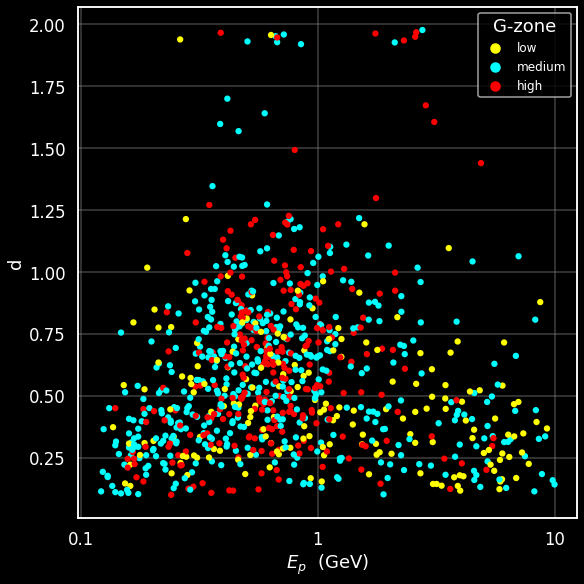

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
df = unid.copy()
df['G-zone'] = df.G.apply(lambda g: 'high' if g>1. else ('low' if (g<0.2) & (g>-0.4) else 'medium'))
show(df.groupby('G-zone').size())
# show(f"""* cut: {(cut:='d_unc<0.5')}""") 
show(f"""* cut: {(cut:='d>0.1& d_unc<0.5 & significance<10')}""")
sns.scatterplot(df.query(cut), ax=ax, x='log_epeak', y='d', s=40, edgecolor='none',
          hue='G-zone', palette=['yellow', 'cyan', 'red'] );
sns.move_legend(ax, fontsize=12, loc='upper right')
ax.set(**epeak_kw());
show(fig)

In [7]:
show(f"""# unID fits""")
show(f"""## All unId""")
show(f"""### Chi squared No-cut FIt details""")
f = galfunc.fitter(unid, 'unID')

f.show_fit(round=0)

# unID fits

## All unId

### Chi squared No-cut FIt details

Function value: 25.4

,isotropic,msp,psr,gevatar
fit,375,332,387,481
+/-,39,52,21,30


Correlations (%):

array([[100, -87,   5,  39],
       [-87, 100,  -3, -55],
       [  5,  -3, 100, -41],
       [ 39, -55, -41, 100]])

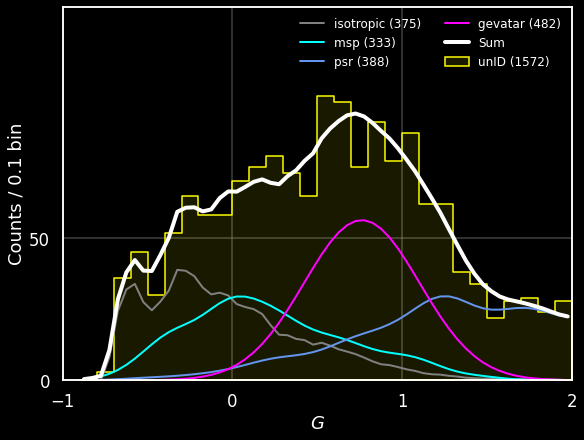

In [8]:
# def plot_fit(self, tdata, # df or df.G values 
#              x0, # component values
#              *, name='unID', palette=None, ax=None): 
    

#     if palette is None: palette = self.palette
#     if isinstance(tdata, pd.DataFrame): tdata=tdata.G
    
#     # multiply evaluated functions by component values
#     tdf = self.func_grid * x0 * self.hist_binsize
   
#     fig, ax = plt.subplots(figsize=(8,6)) if ax is None else (ax.figure, ax)

#     # plot each component
#     for (label, y), color in zip( tdf.items(), palette):
#         ax.plot(tdf.index, y, '-', color=color, label=label+f' ({np.sum(y)/2:.0f})')
        
#     # sum of componenta
#     ax.plot(tdf.index, tdf.sum(axis=1), '-', label='Sum', color='w', lw=4);

#     # data histogram
#     sns.histplot(ax=ax, x=tdata, bins=self.Gbins, element='step', alpha=0.1, color='yellow',
#         label=f'{name} ({len(tdata)})'  )
    
#     ax.set(xlabel='$G$', xticks=np.arange(-1,2.1, 1), xlim=(-1,2),
#         ylabel='Counts / 0.1 bin', yticks=np.arange(0,150,50),ylim=(0,140),)
#     ax.legend(fontsize=12, frameon=False, ncols=2)
#     return fig
    
galfunc.plot_fit(unid, f.opt.x,); # colors='0.5 cyan deepskyblue magenta'.split());

### Plots

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3756a40>
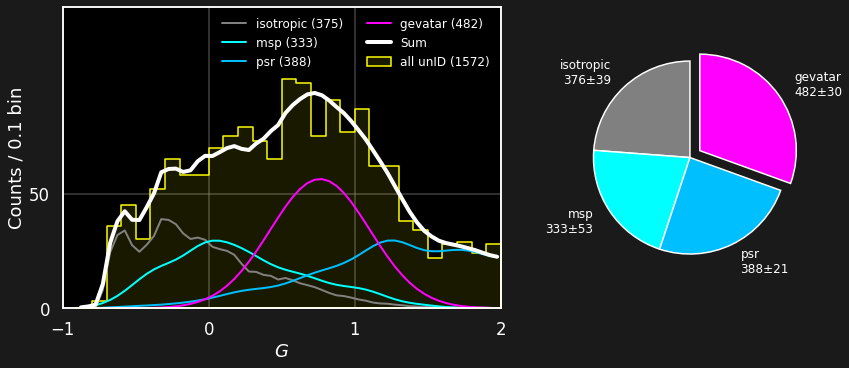

In [9]:
show(f"""### Plots""")
show_fig( galfunc.fit_and_plot, unid, 'all unID',
    facecolor='k',save_to=f'figures/galacticity/all-unid.png')

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b36618a0>
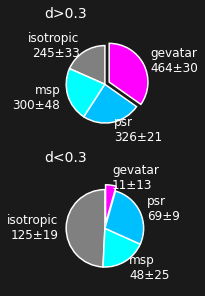

In [10]:
def fit_and_pie(self, data, name, ax=None):
    fig,ax = plt.subplots(figsize=(3,3)) if ax is None else (ax.figure, ax)
    f = self.fitter(data, name)
    f.pie(ax=ax,labeldistance=1.2 , radius=0.8, explode=(0,0,0, 0.1), startangle=90)
    return fig
    
def pies_with_d_cut():
    fig, axx = plt.subplots(nrows=2, figsize=(9,4))
    for cut, ax in zip(['d>0.3', 'd<0.3'], axx):
        ax.set_title(cut, fontsize=14, loc='left')
        fit_and_pie(galfunc, unid.query(cut), 'unid', ax=ax)
    return fig
show_fig(pies_with_d_cut, facecolor='k', 
         save_to='figures/galacticity/pies_with_d_cut.png' );

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3500c10>
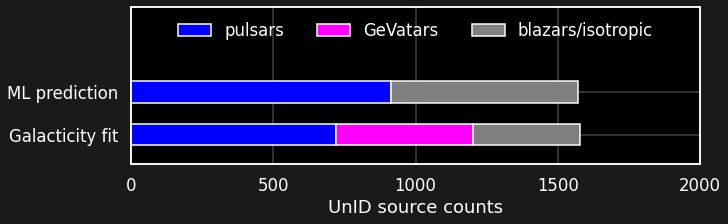

In [11]:
def comparison_bar_chart(unid):
    # table to fill
    tbl = np.zeros((2,3)).astype(int)
    
    # the Galacticity based estimate
    f = galfunc.fitter(unid, 'unID')
    gfit = pd.Series(f.opt.x); 
    tbl[0] = [gfit['msp']+gfit['psr'], gfit['gevatar'],gfit['isotropic']]
    
    # the NN classifier predictions
    def ml_cat(s):
        t  = s.split('-')
        if len(t)==0: return ''
        if  t[0] != 'unID': return ''
        return t[1]        
    z = unid.source_type.apply(ml_cat)  
    a,b =np.unique(z,return_counts=True)
    u= dict( (i,j) for i,j in zip(a,b))
    tbl[1] = [u['pulsar'],0,u['blazar']]

    # create labeled table
    dftbl = pd.DataFrame(tbl, index=['Galacticity fit', 'ML prediction'], 
                    columns='pulsars  GeVatars blazars/isotropic'.split())

    # now the plot
    fig, ax = plt.subplots(figsize=(10,3))
    ax = dftbl.plot.barh(ax=ax, stacked=True,
                        color='blue magenta grey'.split())
    ax.legend(ncols=3, frameon=False,loc='upper center')
    ax.set(ylim=(-0.7,3), xlabel='UnID source counts', xticks=np.arange(0,2001, 500),
          ylabel='',xlim=(0,2000));
    return fig
    
show_fig(comparison_bar_chart, unid, facecolor='k', 
         save_to='figures/galacticity/comparison_bar_chart.png');


In [12]:
if False:
    show(f"""file for Kent - {(filename:='files/unid_for_kent.csv')}""")
    cut='Ep<1 & d_unc<0.5 & 0.3<G<1.2 '
    dfout = unid.copy()
    dfout['gev_enh'] = unid.eval(cut)
    dfout.to_csv(filename, float_format='%.3f')

## Fit with unid selection d>0.3 & Ep<1 & significance<10

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3500130>
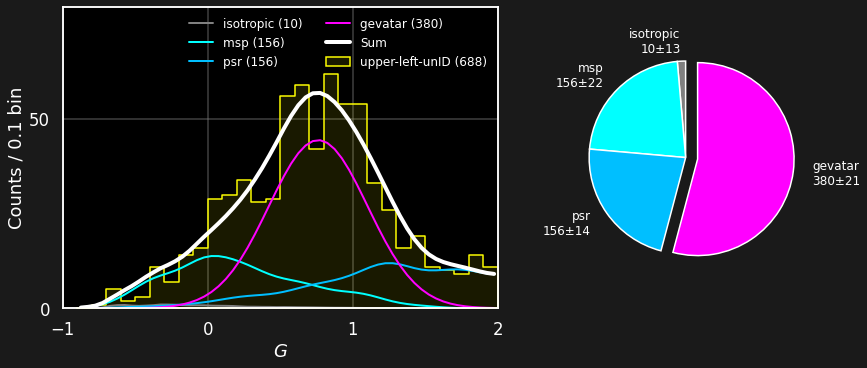

## Fit with unid selection d<0.3 | Ep>1 & significance<10

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3661600>
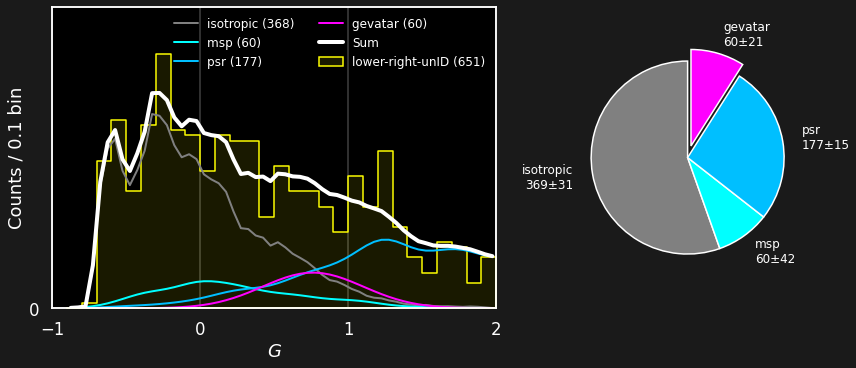

## Fit with unid selection Ep_unc<Ep

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b37573d0>
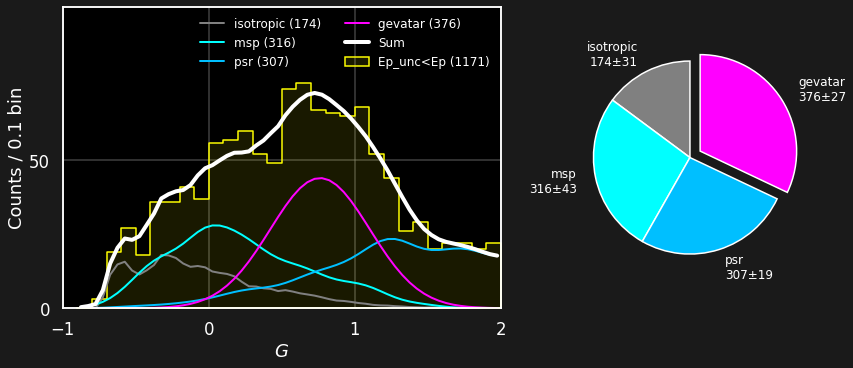

In [13]:
show(f"""## Fit with unid selection {(cut:='d>0.3 & Ep<1 & significance<10')}""")
# fitter(unid.query(cut), 'cut unid');
show_fig(galfunc.fit_and_plot, unid.query(cut), (name:='upper-left-unID'),
        facecolor='k',save_to=f'figures/galacticity/{name}.png')

show(f"""## Fit with unid selection {(cut:='d<0.3 | Ep>1 & significance<10')}""")
# fitter(unid.query(cut), 'cut unid');
show_fig(galfunc.fit_and_plot, unid.query(cut), (name:='lower-right-unID'),
        facecolor='k',save_to=f'figures/galacticity/{name}.png')

show(f"""## Fit with unid selection {(cut:='Ep_unc<Ep')}""")
show_fig(galfunc.fit_and_plot, unid.query(cut), (name:='Ep_unc<Ep'),
        facecolor='k',save_to=f'figures/galacticity/{name}.png')

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b9298370>
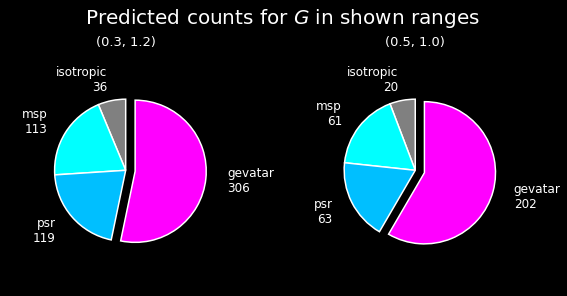

In [14]:
def pie_in_range( range, title, ax=None):
    fig, ax = plt.subplots(figsize=(3,5)) if ax is  None else (ax.figure, ax)
    t = galfunc.fit_values( unid, cut=cut)
    counts = galfunc.integral( range=range, norms=t) 
    ax.pie (counts.values(), 
             labels= [f'{name}'+'\n'+f'{val:.0f}' for (name,val) in counts.items()], 
             textprops=dict(fontsize=12),
             colors='0.5 cyan deepskyblue magenta'.split(),
             autopct=None, radius=0.75,
             labeldistance=1.3 ,  explode = (0,0,0, 0.1), startangle=90,
            );
    ax.set_title(title, fontsize=13)
    return fig

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,4), )
fig.suptitle('Predicted counts for $G$ in shown ranges',fontsize=20)
pie_in_range((range:=(0.3,1.2)), f"""{range}""", ax=ax1);
pie_in_range((range:=(0.5,1.0)), f"""{range}""", ax=ax2);
show(fig)

### Fit with unid selection d_unc>0.2 & d>0.2 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b936b520>
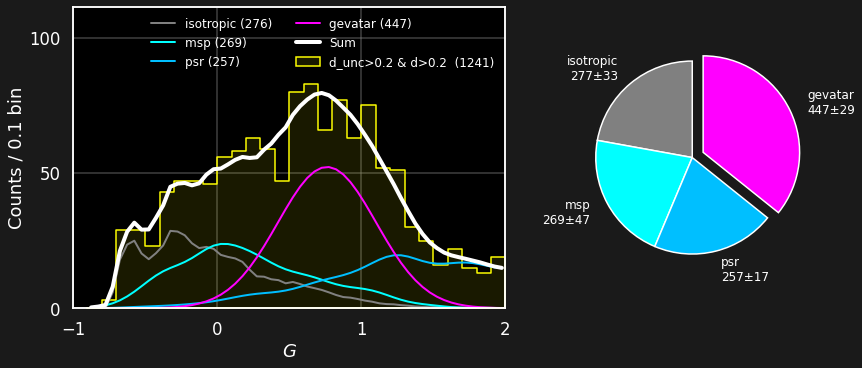

In [15]:
show(f"""### Fit with unid selection {(cut:='d_unc>0.2 & d>0.2 ')}""")
# fitter(unid.query(cut), 'cut unid');
show_fig(galfunc.fit_and_plot, unid.query(cut), (name:=cut),
        facecolor='k',save_to=f'figures/galacticity/{name}.png', yticks=np.arange(0,101,50))

## Quadrant pie charts

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3496e90>
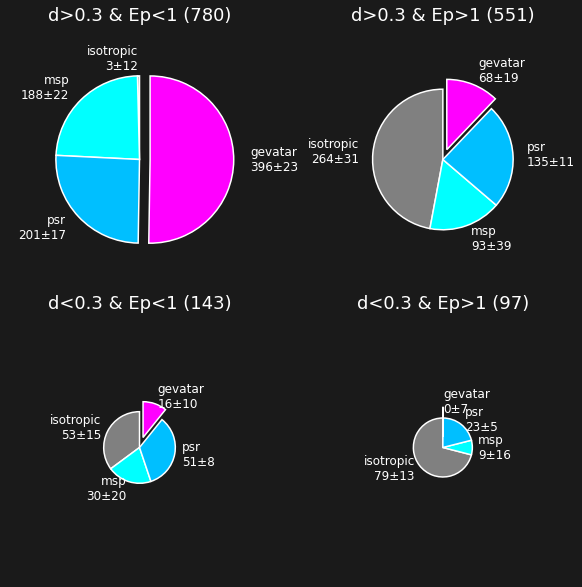

In [16]:
show(f"""## Quadrant pie charts""")
def quad_pies():
    quads = ['d>0.3 & Ep<1',
             'd>0.3 & Ep>1',
             'd<0.3 & Ep<1',
             'd<0.3 & Ep>1']
    fig, axx = plt.subplots(2,2,figsize=(8,8),)
    for ax, quad in zip(axx.flat, quads):
        df = unid.query(quad)
        galfunc.fit_and_pie(df , quad, ax=ax, radius=0.8*np.sqrt(len(df)/800))
        ax.set_title(quad+ f' ({len(df)})')
    return fig
show_fig(quad_pies, facecolor='k', save_to='figures/galacticity/quad-pies.png')

## Ridge check containing 58

### Fit with unid selection ridge==False

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b91a1f30>
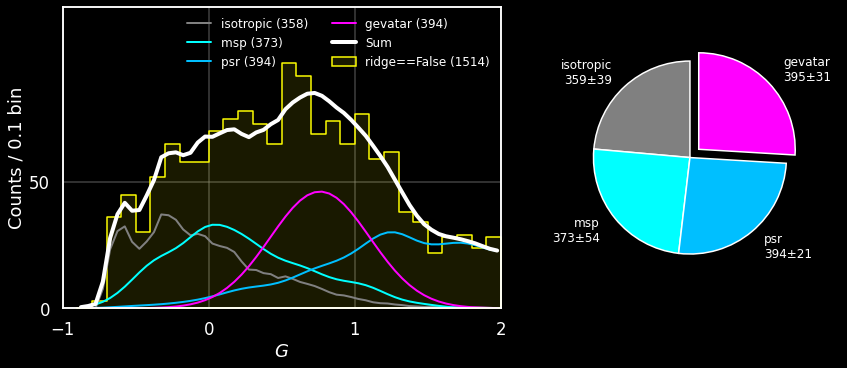

### Fit with unid selection ridge==True

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b32a3520>
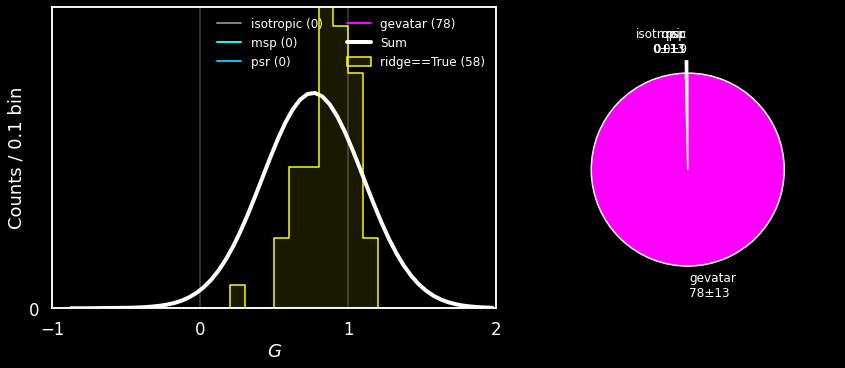

In [17]:
unid['inner_gal'] = (unid.glon>90) & (unid.glon<270)
unid['ridge'] = (unid.glon>120) & (unid.glon<240) & (np.abs(unid.glat)<5)
show(f"""## Ridge check containing {sum(unid.ridge)}""")
show(f"""### Fit with unid selection {
    (cut:='ridge==False'   )}""")
show_fig(galfunc.fit_and_plot, unid.query(cut), (name:=cut),)

show(f"""### Fit with unid selection {
    (cut:='ridge==True'   )}""")
show_fig(galfunc.fit_and_plot, unid.query(cut), (name:=cut),)


## Fit with unid selection Ep>2 & d<0.5

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3497070>
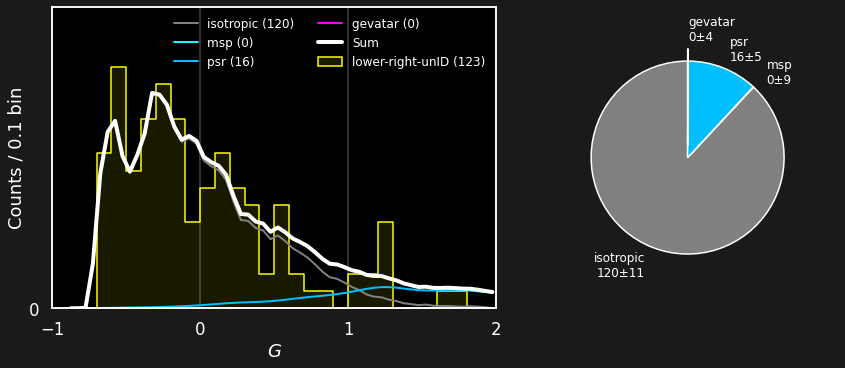

In [18]:
show(f"""## Fit with unid selection {(cut:='Ep>2 & d<0.5')}""")
# fitter(unid.query(cut), 'cut_unid')
show_fig(galfunc.fit_and_plot, unid.query(cut), (name:='lower-right-unID'),
         facecolor='k',save_to=f'figures/galacticity/{name}.png')
# show(pie(galfunc.fitter(unid.query(cut), name), labeldistance=1.2 , radius=0.8, explode = (0,0,0, 0.1)));

# Comprehsive plots

## all unID

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3276050>
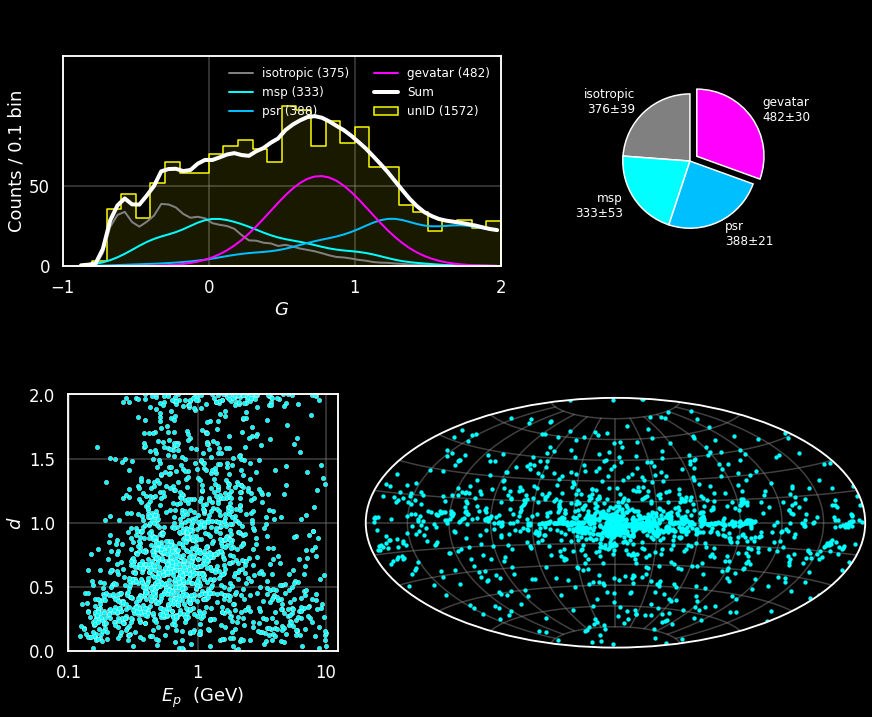

## unID low energy

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b910f070>
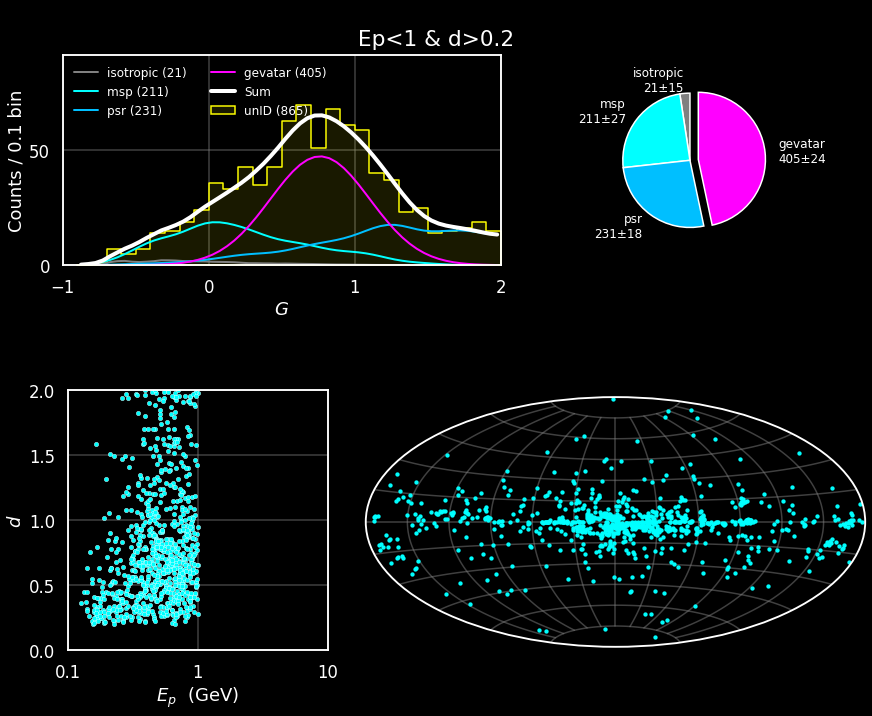

## GeVatar enhanced

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b35eb8b0>
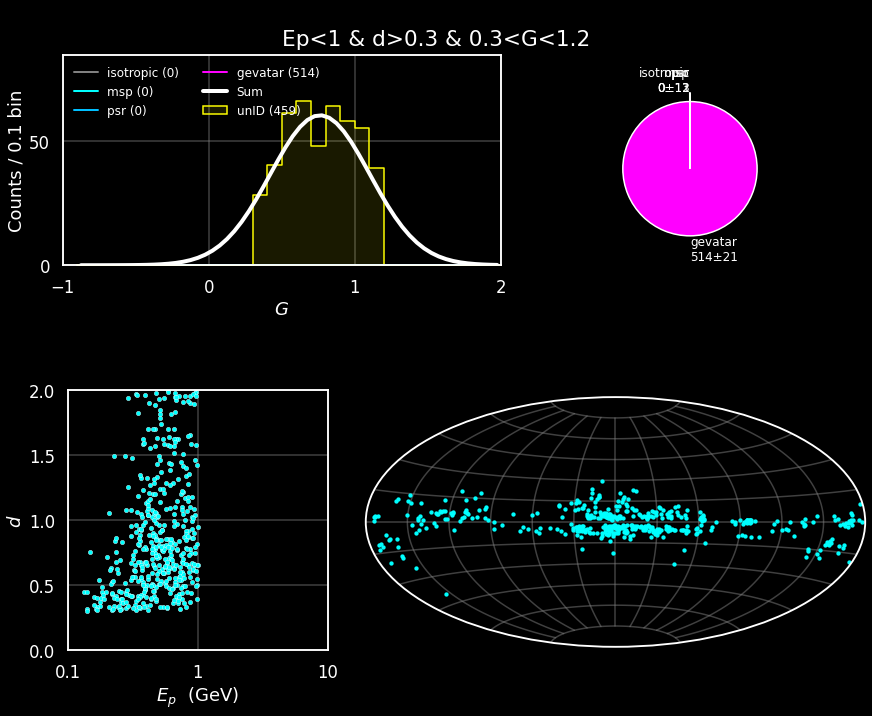

## Pulsars
Actual: msp 173, psr 135

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b3269f60>
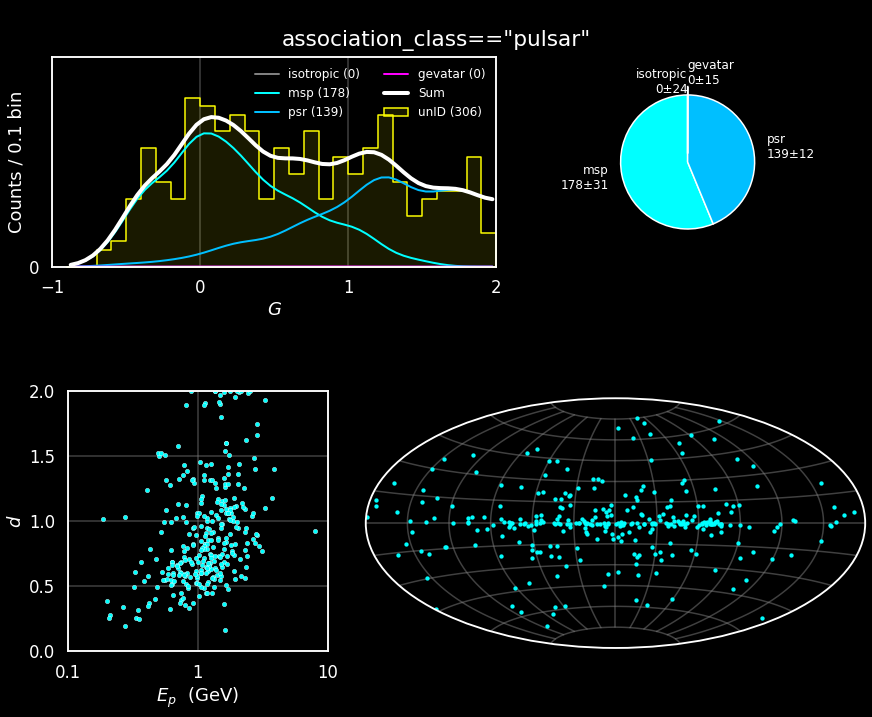

## Blazars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b2ef3eb0>
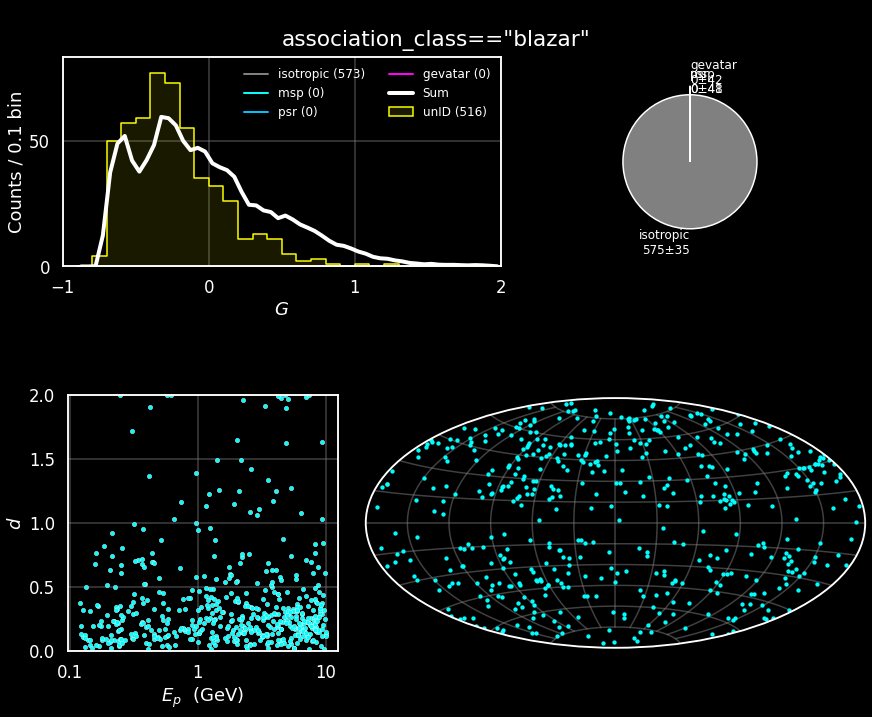

In [19]:
show(f"""# Comprehsive plots""")
items = [('all unID', unid, '', ),
         ( 'unID low energy',  unid, ' Ep<1 & d>0.2 '),
         ('GeVatar enhanced', unid, 'Ep<1 & d>0.3 & 0.3<G<1.2'),
         ( 'Pulsars\nActual: msp 173, psr 135', all_data, 'association_class=="pulsar"'),
         ( 'Blazars', all_data, 'association_class=="blazar"'),
        ]
for (title, data, cut) in items:
    show(f"""## {title}""")
    show_fig(galfunc.multiplot, data, cut,'')    

In [20]:
all_data.query('association_class=="pulsar"').groupby('association').size()

association
msp    173
psr    133
dtype: int64

---
# Check the galacticity of the 171 non-pulsar Galactic sources

association,bin,glc,hmb,lmb,pwn,sfr,snr,spp
# Sources,6,33,5,6,5,2,26,88


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b2c103d0>
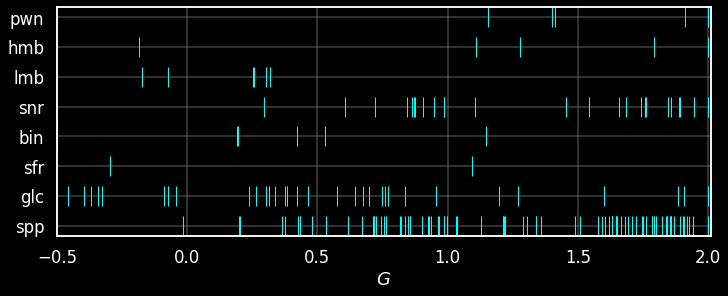

In [21]:
gal =all_data.groupby('association_class').get_group('Gal')
show(f"""---
# Check the galacticity of the {len(gal)} non-pulsar Galactic sources""")
show(pd.Series(gal.groupby('association').size(), name='# Sources'))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(gal.diffuse.clip(-0.5,2), gal.association, '|', ms=20, color='cyan');
ax.set(xlabel='$G$', xlim=(-0.5,2.01))
show(fig)

--- 
# Binned likelihood&mdash;demonstrate multinomial fit
Do a proper maximum likelihood fit to the binned histogram

Function value: -6455.3

,isotropic,msp,psr
fit,365,337,383
+/-,52,75,27


Correlations:

array([[ 1.  , -0.91,  0.01],
       [-0.91,  1.  , -0.14],
       [ 0.01, -0.14,  1.  ]])

$\rightarrow$ Implied number of gevatars:
477 $\pm$ 38

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b2e2d150>
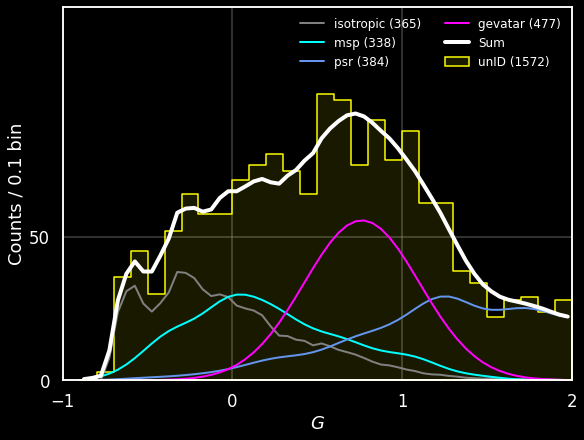

In [22]:
show(f"""--- 
# Binned likelihood&mdash;demonstrate multinomial fit
Do a proper maximum likelihood fit to the binned histogram""")

target_data = unid.diffuse
ll = galfunc.binned_likelihood(target_data)
opt = ll.maximize() #optimize.minimize(ll, np.array([150]*3), bounds= optimize.Bounds([0.1]*3, [1e3]*3 ))
fit_x = opt.x
opt.x = dict( (name, value) for name,value in zip( list(galfunc.keys())[:3], fit_x))

show_fit(opt, round=0)
show(fr"""$\rightarrow$ Implied number of gevatars:
{ll.N-np.sum(fit_x):.0f} $\pm$ {np.sqrt((opt.hess_inv.todense()).sum()):.0f}
""")

tdata = unid.diffuse
x = np.append(fit_x, ll.N-sum(fit_x))
show(galfunc.plot_fit(target_data, x));


## unID high d

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b90b5d50>
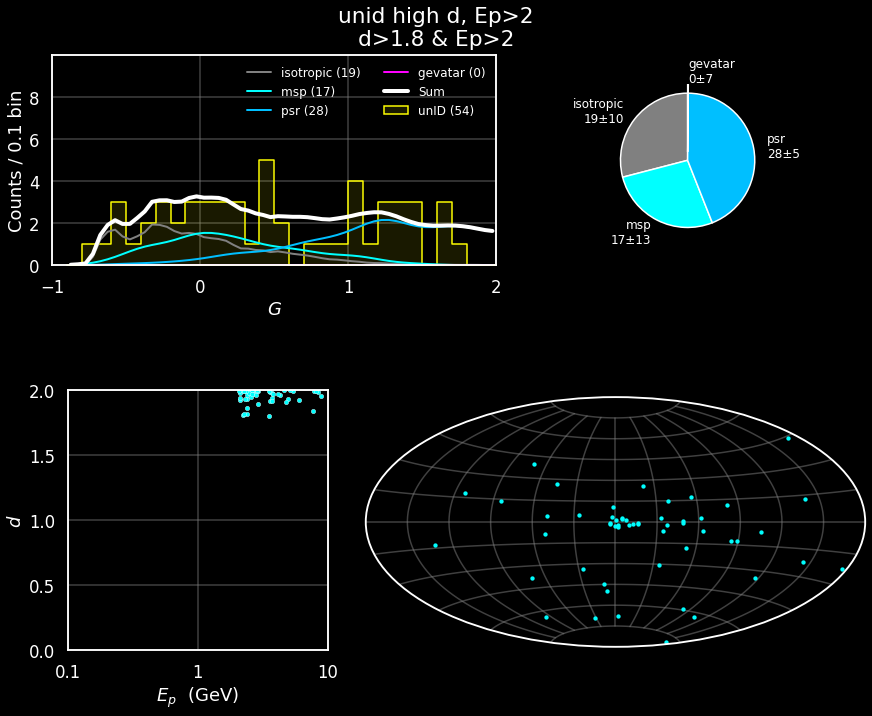

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b920fd90>
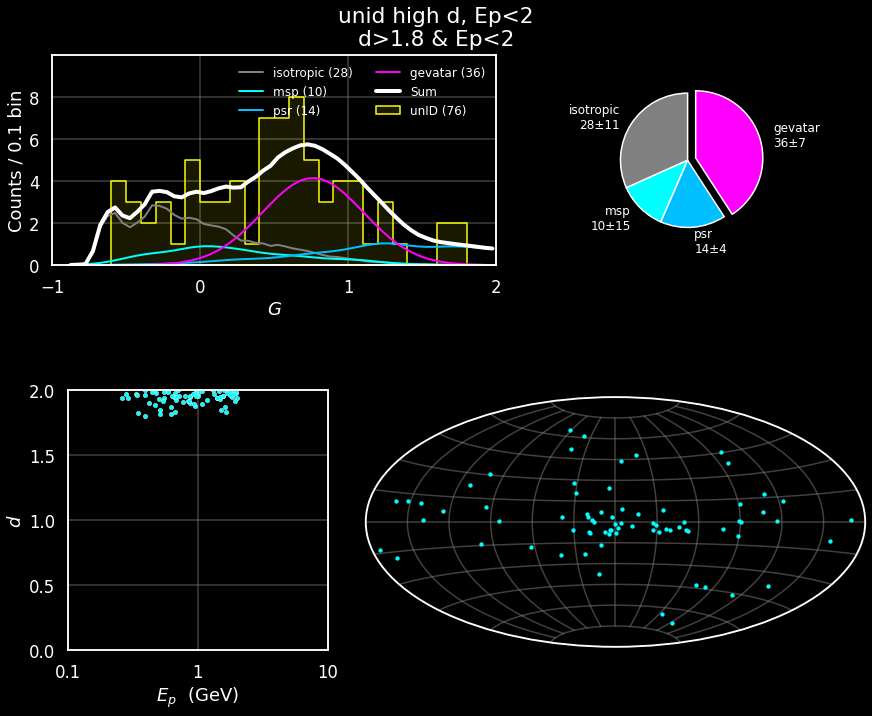

In [23]:
show("""## unID high d""")
show_fig( galfunc.multiplot, unid, 'd>1.8 & Ep>2','unid high d, Ep>2', ylim=(0,10), yticks=np.arange(0,10,2)) 
show_fig( galfunc.multiplot, unid, 'd>1.8 & Ep<2','unid high d, Ep<2', ylim=(0,10), yticks=np.arange(0,10,2)) 

# Semiplots

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b2b27d60>
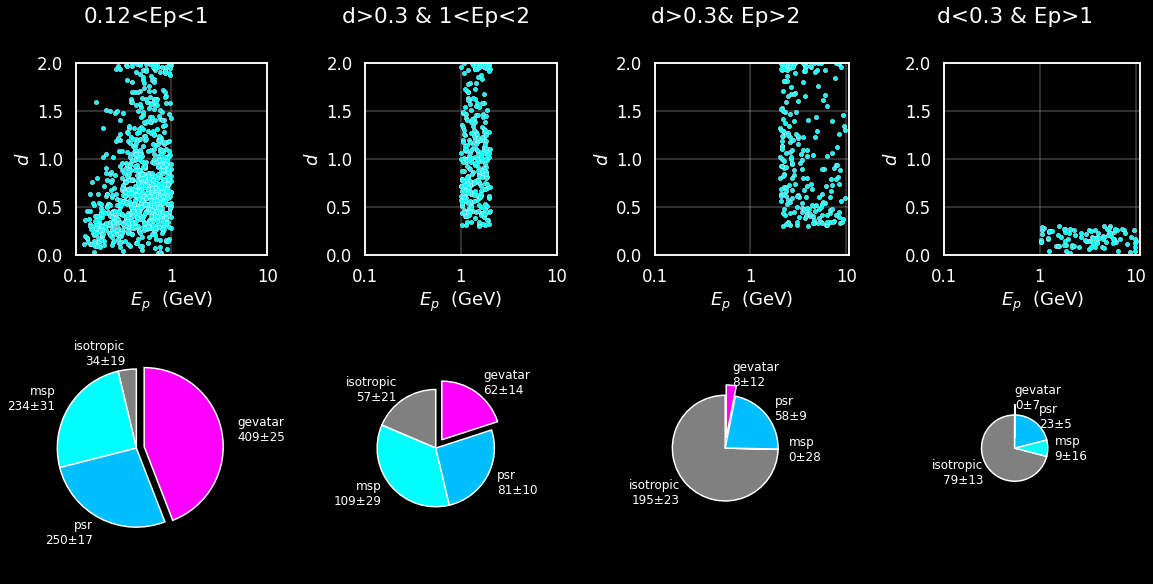

In [24]:
show(f"""# Semiplots""")

def multi_semi(self, unid,  cuts ):
    ncuts = len(cuts)
    fig = plt.figure(layout='constrained', figsize=(4*ncuts,8))
    
    for sfig, cut in zip( fig.subfigures(ncols=ncuts), cuts):
        df = unid.query(cut) if cut else unid
        self.semiplot( df, '',cut, radius=0.8*np.sqrt(len(df)/600), fig=sfig);
    return fig
show_fig(multi_semi, galfunc, unid,
            cuts = [ '0.12<Ep<1', 'd>0.3 & 1<Ep<2', 'd>0.3& Ep>2','d<0.3 & Ep>1'])

### Project aflux with 0<G<1.2

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b2ba3ca0>
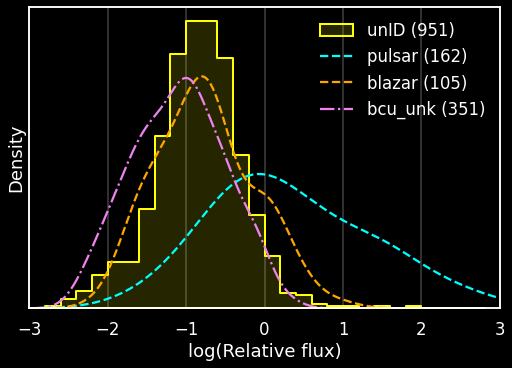

All $G$ values

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b2b27550>
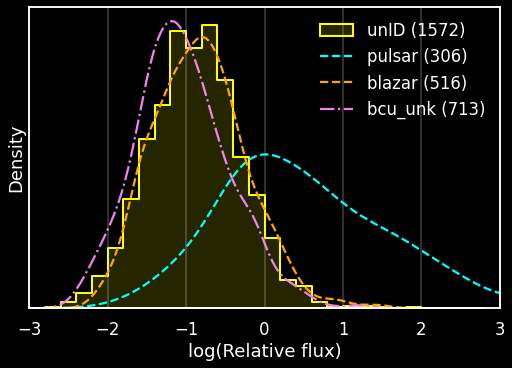

In [25]:
show(f"""### Project aflux with {(acut:='0<G<1.2')}""")


def rel_flux_plots(all_data, *, ax=None, cut=cut):
    """
    Comparison of the unID relative flux with pulsars and blazars.
    Density plots with respect to the log of the relative flux, the peak flux divided by the diffuse.
    Pulsar and blazar curves are KDE representations of the respective distributions.

    """    
    data = all_data.query(cut) if cut else all_data
    subgrp = data.groupby('subset')
    unid = subgrp.get_group('unID')
    blazar= subgrp.get_group('blazar')
    pulsar = data.query('association_class=="pulsar"')
    bcu_unk = data.groupby('association_class').get_group('bcu_unk')
    
    fig, ax = plt.subplots(figsize=(7,5)) if ax is None else (ax.figure, ax)
    hkw = dict(bins=np.arange(-3,3,0.2), element='step', fill=True, alpha=0.15, lw=2, stat='density')
    sns.histplot(unid, ax=ax, x ='rel_flux', label='unID'+f' ({len(unid)})',color='yellow',**hkw)
    
    sns.kdeplot(pulsar, ax=ax, x ='rel_flux', label='pulsar'+f' ({len(pulsar)})', ls='--', color='cyan')
    sns.kdeplot(blazar, ax=ax, x ='rel_flux', label='blazar'+f' ({len(blazar)})', ls='--',color='orange')
    sns.kdeplot(bcu_unk, ax=ax, x ='rel_flux', label='bcu_unk'+f' ({len(bcu_unk)})', ls='-.',color='violet')
    ax.set(xlabel='log(Relative flux)', xlim=(-3,3), yticks=[])
    ax.legend(frameon=False)

    return fig
    
show_fig( rel_flux_plots, all_data, cut=acut);

show(f"""All $G$ values""")
show_fig( rel_flux_plots, all_data, cut='');

In [26]:
all_data.groupby('association_class').size()

association_class
Gal         171
bcu_unk     713
blazar      516
egal         36
gc            1
nov           1
pulsar      306
unID       1572
dtype: int64

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7ff9b2bf25f0>
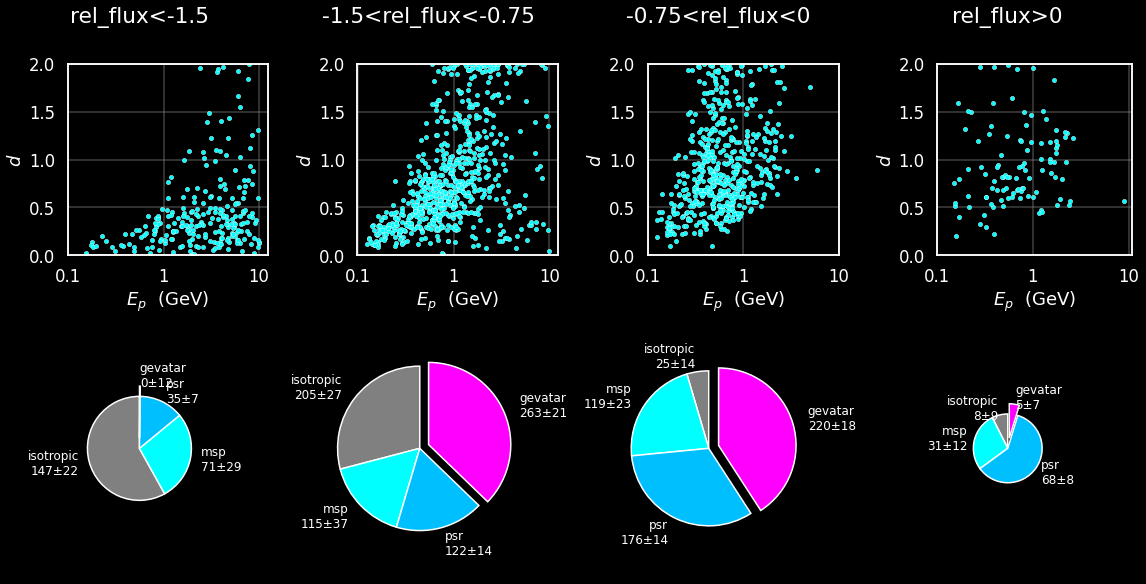

In [27]:
show_fig(multi_semi, galfunc, unid.query('Ep>0.12'),
        cuts=['rel_flux<-1.5', '-1.5<rel_flux<-0.75','-0.75<rel_flux<0',  
              'rel_flux>0'])

In [28]:
if False:
    show(f"""# Optimize the skewnorm parameters
    Selection: "{(cut:='d>0.4 & Ep<1')}" 
    """)
    gpars=GalFunctions.gevpars
    show(f"""Initial values: {(gpars)}""")
    data_to_fit = unid.query(cut).diffuse
    def myfun(gpars):
        self = GalFunctions(all_data, gpars=gpars)
        opt = self.chisq_fit(data_to_fit) #,x0=[300]*4) # x0=dict(msp=268, psr=419, gevatar=479,isotropic=392))
        return opt.fun
    # print(myfun(gpars))
    
    tfun = lambda x: myfun(dict(loc=x[0], scale=x[1], a=x[2]))
    # print( tfun(list(gpars.values())))
    
    from scipy import optimize
    opt = optimize.minimize(tfun, list(gpars.values()) )
    show_fit(opt, round=3, names='loc scale a'.split())